# Primitives

In [2]:
import tensorflow as tf
import skimage
import numpy as np
import matplotlib.pyplot as plt 

print(tf.__version__)

2.0.0


In [3]:
c1, c2 = tf.constant([0,1,2,3]), tf.constant([0,1,2,3])
res = tf.multiply(c1, c2)
print('result: {0}'.format(res))

result: [0 1 4 9]


## Dataset uploading

In [ ]:
!python -m pip install -U scikit-image

In [5]:
#  data uploader - we have many folders with .ppm files
def load_data(data_dir):    
    images = []
    labels = []
    dirs = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
    
    for folder in dirs:
        type_folder = os.path.join(data_dir, folder)
        filenames = [os.path.join(type_folder, f)
                    for f in os.listdir(type_folder)
                    if f.endswith('.ppm')]
        

        for f in filenames:
            images.append(skimage.data.imread(f)) #here we're reading file
            labels.append(int(folder))
    
    print(images[0])
    print(labels[:20])

    return images, labels

ROOT_PATH = 'C:/Users/Sunny/kaggle_contests/[04] Tensorflow basics'
train_data_dir = os.path.join(ROOT_PATH, 'Training')
test_data_dir = os.path.join(ROOT_PATH, 'Testing')

images, labels = load_data(train_data_dir)

[[[210 249 232]
  [204 249 208]
  [197 198 155]
  ...
  [ 51  60  40]
  [ 54  64  44]
  [ 57  66  46]]

 [[209 250 236]
  [212 255 217]
  [200 196 156]
  ...
  [ 49  57  38]
  [ 51  59  41]
  [ 53  60  42]]

 [[203 246 236]
  [207 246 213]
  [202 192 156]
  ...
  [ 47  53  35]
  [ 48  54  36]
  [ 48  55  37]]

 ...

 [[  2  22  25]
  [ 26  56  77]
  [ 71 140 159]
  ...
  [ 84  77  50]
  [ 68  66  41]
  [ 56  64  44]]

 [[  0  22  32]
  [ 30  75 106]
  [ 87 176 198]
  ...
  [ 86  80  52]
  [ 68  66  41]
  [ 55  63  42]]

 [[  0  32  50]
  [ 42 101 135]
  [121 217 239]
  ...
  [ 87  80  52]
  [ 70  68  43]
  [ 58  66  46]]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


## Data understanding

In [6]:

images = np.array(images)
labels = np.array(labels)

print("Images size: {0}".format(images.size))
print("Labels size: {0}".format(labels.size))

Images size: 4575
Labels size: 4575


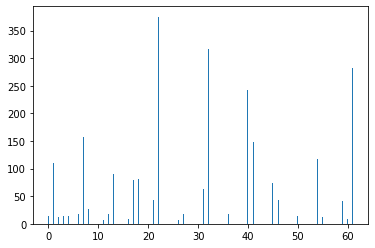

In [7]:
plt.hist(labels, 500) # 500 points
plt.show() 

x axis means type, y - count of values. We see that 22, 32, 40 and 61 sighs are more popular in this dataset 

## Visualization

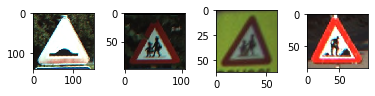

In [8]:
examples = [100, 200, 300, 400]

for i in range(len(examples)):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[examples[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

There are so many pictures with different size!

1: size: (139, 152, 3), min: 0, max: 255
2: size: (98, 107, 3), min: 0, max: 203
3: size: (62, 61, 3), min: 3, max: 160
4: size: (85, 96, 3), min: 0, max: 255


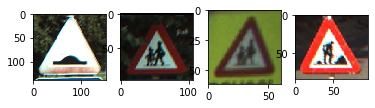

In [17]:
for i in range(len(examples)):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[examples[i]])
    print("{0}: size: {1}, min: {2}, max: {3}".format(i+1, images[examples[i]].shape,
                                                    images[examples[i]].min(),
                                                    images[examples[i]].max()))

Let's take a look on another graphics

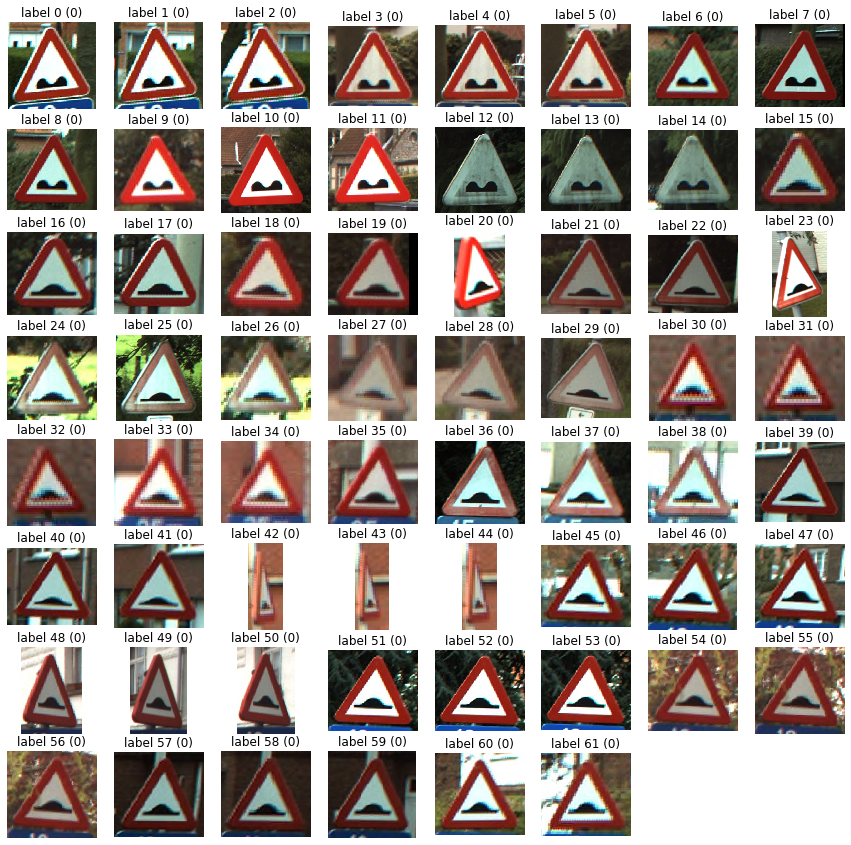

In [38]:
unique_labels = list(set(labels)) #this way we ignore the same labels
i = 1 

plt.figure(figsize=(15,15))

for label in unique_labels:
    cur_img = images[unique_labels[label]] 
    plt.subplot(8, 8, i)
    plt.axis("off")
    plt.title("label {0} ({1})".format(label, 0))
    i += 1
    plt.imshow(cur_img)
plt.show()
